### Eventual site of birds-eye-view network preprocessing transformations
Two mapping API's, NuScenes and Argoverse, provide very important information about the intrinsic/extrinisic camera matrices in the data they collect, which means i can do all sorts of transformations on the images and masks, which is important for birds-eye-view transformations

The need for perspective transforms is twofold - first, i can do preprocessing on my data to transform the R^2 image into R^1. I can then use an SVM with no (default? cartesian?) kernel to separate the clusters, and label them either "right" or "left" lane. This will be important, since most direct prediction networks like those used by OpenPilot rely on this disctinction. To my knowledge, there are no public datasets that annotate right/left lane lines, rather annotating "general" lane lines. 

In addition, this will likely be important for training a network to do camera calibration, which is much farther down the list of priorities, but still important. Rotations are affine transformations so i expect calibration to, at the very least, not make predictions worse. The primary use case for camera calibration (in my uneducated opinon) is when you have multiple cameras and need to stitch together a birds-eye-view map, in which case you would need to estimate the intrinsic/extrinisic camera matrix, which is just a step in camera calibration. Although, openpilot does not use multiple cameras and still does calibration, so there is likely some other need for this related to tasks i have not yet started work on, such as estimating distance from a leading car. 


In [62]:
import matplotlib.pyplot as plt
from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.nuscenes import NuScenes
nusc = NuScenes(version='v1.0-mini', dataroot='C:\\Users\\turbo\\Python projects\\Lane finder\\data\\v1.0-mini', verbose=True)


OSError: [WinError 126] The specified module could not be found

In [54]:
nusc.list_scenes()
my_scene = nusc.scene[0]

scene-0061, Parked truck, construction, intersectio... [18-07-24 03:28:47]   19s, singapore-onenorth, #anns:4622
scene-0103, Many peds right, wait for turning car, ... [18-08-01 19:26:43]   19s, boston-seaport, #anns:2046
scene-0655, Parking lot, parked cars, jaywalker, be... [18-08-27 15:51:32]   20s, boston-seaport, #anns:2332
scene-0553, Wait at intersection, bicycle, large tr... [18-08-28 20:48:16]   20s, boston-seaport, #anns:1950
scene-0757, Arrive at busy intersection, bus, wait ... [18-08-30 19:25:08]   20s, boston-seaport, #anns:592
scene-0796, Scooter, peds on sidewalk, bus, cars, t... [18-10-02 02:52:24]   20s, singapore-queensto, #anns:708
scene-0916, Parking lot, bicycle rack, parked bicyc... [18-10-08 07:37:13]   20s, singapore-queensto, #anns:2387
scene-1077, Night, big street, bus stop, high speed... [18-11-21 11:39:27]   20s, singapore-hollandv, #anns:890
scene-1094, Night, after rain, many peds, PMD, ped ... [18-11-21 11:47:27]   19s, singapore-hollandv, #anns:1762
sc

In [55]:
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)


In [56]:
sensor = 'CAM_FRONT'
cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
cam_front_data

{'token': 'e3d495d4ac534d54b321f50006683844',
 'sample_token': 'ca9a282c9e77460f8360f564131a8af5',
 'ego_pose_token': 'e3d495d4ac534d54b321f50006683844',
 'calibrated_sensor_token': '1d31c729b073425e8e0202c5c6e66ee1',
 'timestamp': 1532402927612460,
 'fileformat': 'jpg',
 'is_key_frame': True,
 'height': 900,
 'width': 1600,
 'filename': 'samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg',
 'prev': '',
 'next': '68e8e98cf7b0487baa139df808641db7',
 'sensor_modality': 'camera',
 'channel': 'CAM_FRONT'}

In [ ]:
layer_names = ['road_segment', 'lane', 'ped_crossing', 'walkway', 'stop_line', 'carpark_area']
camera_channel = 'CAM_FRONT'
nusc_map.render_map_in_image(nusc, sample_token, layer_names=layer_names, camera_channel=camera_channel)

nusc_map = NuScenesMap(dataroot='/data/sets/nuscenes', map_name='singapore-onenorth')

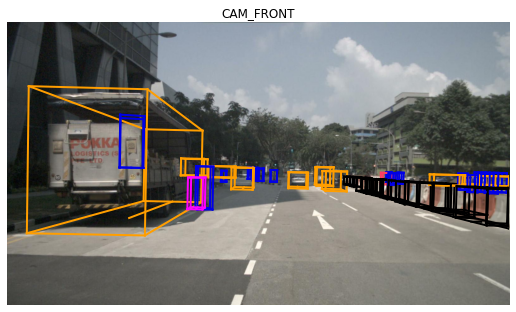

In [57]:
nusc.render_sample_data(cam_front_data['token'])


In [58]:
my_annotation_token = my_sample['anns'][18]
my_annotation_metadata =  nusc.get('sample_annotation', my_annotation_token)